## MatplotLib Objectives
---
- **[] Work Through [MatplotLib Pyplot Tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)**
- **[] Either make an API request or conduct a survey to create a dataset**
- **[] Find a way to store your data in a list that can be plotted via Pyplot**
- **[] Have fun!!!**

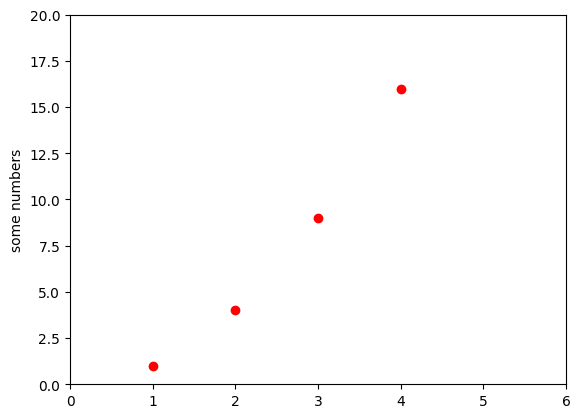

In [3]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.ylabel('some numbers')
plt.axis((0, 6, 0, 20))
plt.show()

In [2]:
import requests
import json

api_url = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/97824/2024-11-17/2024-11-23?unitGroup=us&include=days&key=7CBKB8AFJ3M743GXWHXZR89RQ&contentType=json'
params = {}

response = requests.get(api_url, params=params)
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
highs = []
lows = []

if response.status_code == 200:
    data = response.json()
    #parsed = json.loads(data)

    formatted = json.dumps(data, indent=4)
    #print(formatted)
    for day in data['days']:
        #days.append(day['datetime'])

        highs.append(float(day['tempmax']))
        lows.append(float(day['tempmin']))

    print(days, highs, lows)

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'] [38.0, 39.7, 38.0, 47.1, 47.6, 56.1, 44.1] [33.1, 21.6, 19.2, 34.6, 39.8, 45.6, 35.1]


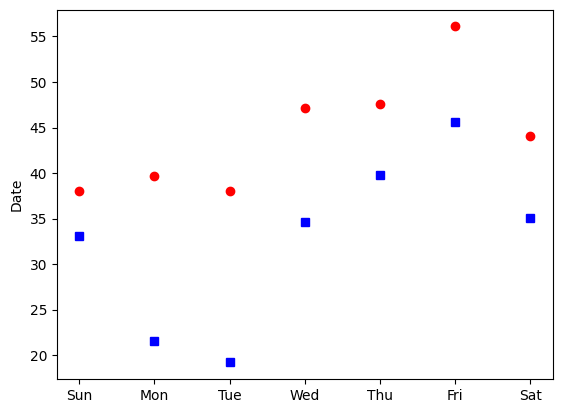

In [3]:
import matplotlib.pyplot as plt

plt.plot(days, highs, 'ro', lows, 'bs')
plt.ylabel('Date')
plt.show()

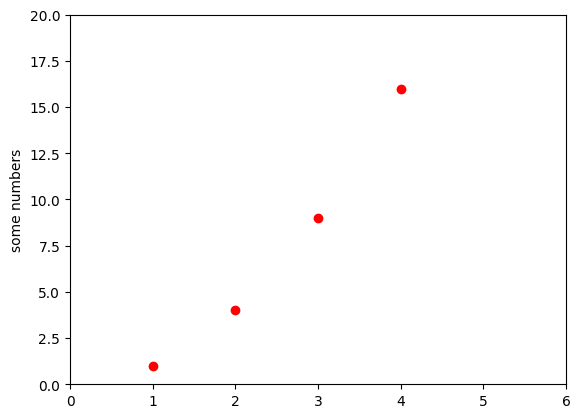

In [6]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis((0, 6, 0, 20))
plt.ylabel('some numbers')
plt.show()

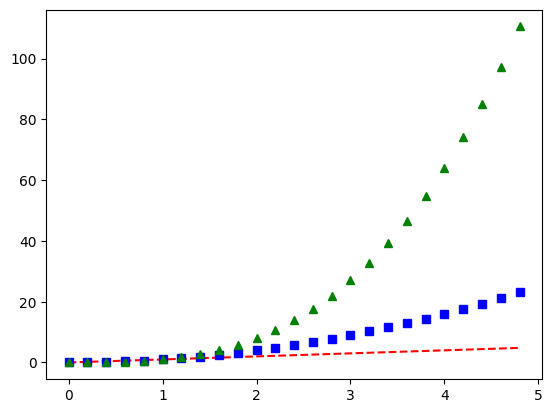

In [6]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

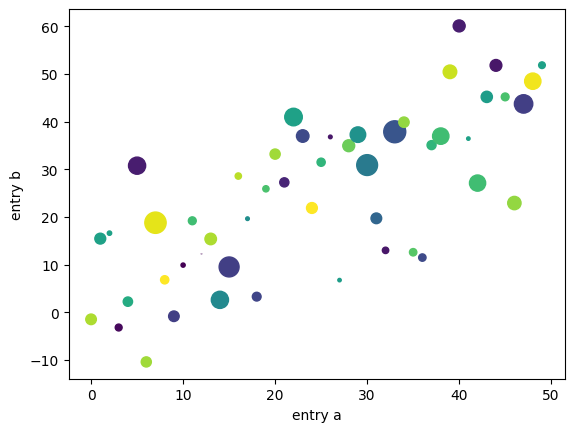

In [8]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

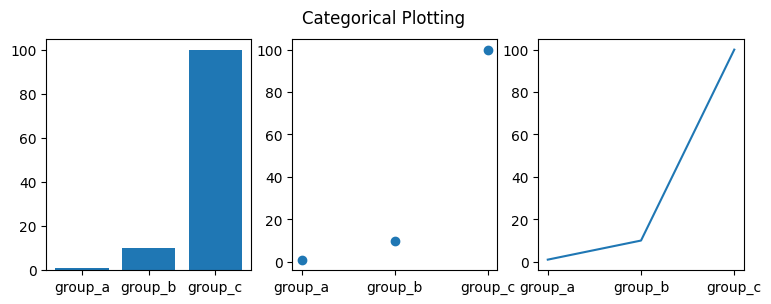

In [2]:
import matplotlib.pyplot as plt

names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# NOAA API token (replace with your token)
API_TOKEN = "iqCBIyfVzNdjFWjnQmKxDrptWZAjRyCk"

# NOAA API endpoint
ENDPOINT = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"

# Location and date range for the past 30 days
LOCATION_ID = "CITY:US360019"  # Replace with your city's location ID
END_DATE = datetime.now().date()
START_DATE = END_DATE - timedelta(days=30)

# API parameters
params = {
    "datasetid": "GHCND",  # Global Historical Climatology Network Daily
    "locationid": LOCATION_ID,
    "startdate": START_DATE.isoformat(),
    "enddate": END_DATE.isoformat(),
    "datatypeid": "TMAX",  # Maximum temperature
    "units": "metric",
    "limit": 1000,  # Maximum number of results
}

# Headers
headers = {
    "token": API_TOKEN
}

# Send the API request
response = requests.get(ENDPOINT, headers=headers, params=params)

# Check for errors
if response.status_code != 200:
    print(f"Error: {response.status_code}, {response.text}")
    exit()

# Parse the response JSON
data = response.json()
results = data.get("results", [])

# Convert to DataFrame
df = pd.DataFrame(results)

# Process the data
df = pd.DataFrame(results)
df["date"] = pd.to_datetime(df["date"])
df["value"] = df["value"] / 10  # Convert temperature from tenths of °C to °C

# Group by date and calculate the average temperature
daily_avg = df.groupby("date")["value"].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(12, 6))
plt.plot(daily_avg["date"], daily_avg["value"], marker="o", linestyle="-", color="blue")
plt.title(f"Maximum Daily Temperatures: {START_DATE} to {END_DATE}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


Error: 502, <!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>502 Proxy Error</title>
</head><body>
<h1>Proxy Error</h1>
<p>The proxy server received an invalid
response from an upstream server.<br />
The proxy server could not handle the request<p>Reason: <strong>Error reading from remote server</strong></p></p>
<p>Additionally, a 502 Bad Gateway
error was encountered while trying to use an ErrorDocument to handle the request.</p>
</body></html>



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

: 

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# NOAA API token
API_TOKEN = "iqCBIyfVzNdjFWjnQmKxDrptWZAjRyCk"

# Coordinates (latitude and longitude)
LAT, LON = 45.6721, -118.7886  # Example: San Francisco

# Date range for historical data (60 days for broader data range)
END_DATE = datetime.now()
START_DATE = END_DATE - timedelta(days=60)

# NOAA endpoints
STATIONS_ENDPOINT = "https://www.ncei.noaa.gov/cdo-web/api/v2/stations"
DATA_ENDPOINT = "https://www.ncei.noaa.gov/cdo-web/api/v2/data"

# Headers for NOAA requests
headers = {
    "token": API_TOKEN
}

# Step 1: Find the closest station to the given latitude and longitude
def get_closest_station(lat, lon):
    print("Finding the closest station...")
    params = {
        "extent": f"{lat-0.5},{lon-0.5},{lat+0.5},{lon+0.5}",  # Bounding box
        "limit": 1  # Only get the closest station
    }
    response = requests.get(STATIONS_ENDPOINT, headers=headers, params=params)
    
    if response.status_code == 200:
        stations_data = response.json().get("results", [])
        if not stations_data:
            print("No stations found near the specified location.")
            return None
        station = stations_data[0]
        print(f"Closest station found: {station['name']} (ID: {station['id']})")
        return station['id']
    else:
        print(f"Error finding stations: {response.status_code}, {response.text}")
        return None

# Step 2: Retrieve historical weather data for a specific data type
def get_weather_data(station_id, start_date, end_date, data_type):
    print(f"Retrieving {data_type} data for station {station_id}...")
    params = {
        "datasetid": "GHCND",  # Global Historical Climatology Network Daily
        "stationid": station_id,
        "startdate": start_date.isoformat(),
        "enddate": end_date.isoformat(),
        "datatypeid": data_type,  # Use selected data type
        "units": "metric",
        "limit": 1000
    }
    response = requests.get(DATA_ENDPOINT, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json().get("results", [])
        if not data:
            print(f"No data found for {data_type} for the specified station and date range.")
            return None
        return data
    else:
        print(f"Error retrieving data: {response.status_code}, {response.text}")
        return None

# Step 3: Plot the data
def plot_weather_data(data, start_date, end_date):
    print("Plotting data...")
    df = pd.DataFrame(data)
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = df["value"] / 10  # Convert tenths of °C to °C

    # Aggregate data by date
    daily_avg = df.groupby("date")["value"].mean().reset_index()

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(daily_avg["date"], daily_avg["value"], marker="o", linestyle="-", color="blue")
    plt.title(f"Maximum Daily Temperatures: {start_date.date()} to {end_date.date()}")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main program
def main(lat, lon, start_date, end_date):
    station_id = get_closest_station(lat, lon)
    if not station_id:
        return
    
    # List of possible data types to try
    data_types = ["TMAX", "TMIN", "PRCP", "SNWD", "SNOW"]
    for data_type in data_types:
        print(f"Trying data type: {data_type}")
        weather_data = get_weather_data(station_id, start_date, end_date, data_type)
        if weather_data:
            plot_weather_data(weather_data, start_date, end_date)
            return  # Data found, no need to try further data types
    
    print("No data found for any of the requested data types.")

# Run the program
main(LAT, LON, START_DATE, END_DATE)


Finding the closest station...
Closest station found: ECHO, OR US (ID: COOP:352564)
Trying data type: TMAX
Retrieving TMAX data for station COOP:352564...
No data found for TMAX for the specified station and date range.
Trying data type: TMIN
Retrieving TMIN data for station COOP:352564...
No data found for TMIN for the specified station and date range.
Trying data type: PRCP
Retrieving PRCP data for station COOP:352564...
No data found for PRCP for the specified station and date range.
Trying data type: SNWD
Retrieving SNWD data for station COOP:352564...
No data found for SNWD for the specified station and date range.
Trying data type: SNOW
Retrieving SNOW data for station COOP:352564...
No data found for SNOW for the specified station and date range.
No data found for any of the requested data types.
